<a href="https://colab.research.google.com/github/juHa1205/NLP_2023/blob/main/20191067%ED%95%98%EC%A7%80%EC%9B%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
np.random.seed(5)


In [165]:

df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")
df.head(3)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6


In [166]:
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [167]:
from sklearn.model_selection import train_test_split

train_6, test_6 = train_test_split(df, test_size = 0.2, random_state=99)

print(train_6.shape, test_6.shape)

(80, 8) (20, 8)


In [168]:
train_6

,Player,Pos,3P,2P,TRB,AST,STL,BLK
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
45,Buddy Hield,SG,1.8,2.2,3.3,1.5,0.5,0.1
54,Frank Kaminsky,C,1.5,2.7,4.5,2.2,0.6,0.5
25,Andre Drummond,C,0.0,5.9,13.8,1.1,1.5,1.1
...,...,...,...,...,...,...,...,...
73,Victor Oladipo,SG,1.9,4.3,4.3,2.6,1.2,0.3
40,Montrezl Harrell,C,0.0,3.9,3.8,1.1,0.3,0.7
57,Kosta Koufos,C,0.0,3.0,5.7,0.7,0.5,0.7
35,Marcin Gortat,C,0.0,4.8,10.4,1.5,0.5,0.7


In [169]:
test_6

,Player,Pos,3P,2P,TRB,AST,STL,BLK
14,Kentavious Caldwell-Pope,SG,2.0,2.9,3.3,2.5,1.2,0.2
34,Eric Gordon,SG,3.3,2.2,2.7,2.5,0.6,0.5
30,Marc Gasol,C,1.4,5.8,6.3,4.6,0.9,1.3
78,Josh Richardson,SG,1.4,2.4,3.2,2.6,1.1,0.7
16,Willie Cauley-Stein,C,0.0,3.4,4.5,1.1,0.7,0.6
15,Clint Capela,C,0.0,5.6,8.1,1.0,0.5,1.2
91,Karl-Anthony Towns,C,1.2,8.5,12.3,2.7,0.7,1.3
38,A.J. Hammons,C,0.2,0.5,1.6,0.2,0.0,0.6
10,Tarik Black,C,0.0,2.2,5.1,0.6,0.4,0.7
85,Marreese Speights,C,1.3,1.7,4.5,0.8,0.3,0.5


In [174]:
x_train = train_6[['3P','TRB','BLK']]
y_train = train_6[['Pos']]

In [175]:
x_train

,3P,TRB,BLK
97,1.8,3.3,0.4
4,1.5,4.3,0.5
45,1.8,3.3,0.1
54,1.5,4.5,0.5
25,0.0,13.8,1.1
...,...,...,...
73,1.9,4.3,0.3
40,0.0,3.8,0.7
57,0.0,5.7,0.7
35,0.0,10.4,0.7


In [176]:
train_6.shape[0]

80

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train_6.shape[0] //2
k_list = []
for i in range(3, max_k_range,2):
  k_list.append(i)



In [126]:
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [127]:
cross_validation_scores = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn,x_train, y_train.values.ravel(),cv=10,scoring='accuracy')
  print(scores)

[0.875 1.    1.    0.875 0.875 1.    1.    1.    1.    0.875]
[0.875 0.875 1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.875 1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  1.    1.    0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  0.875 0.875 0.75  0.875 1.    0.875 1.    1.   ]
[0.875 0.75  0.875 0.875 0.75  0.875 1.    0.875 1.    1.   ]
[0.875 0.75  0.875 0.875 0.75  0.875 1.    0.875 1.    1.   ]
[0.875 0.75  0.875 0.875 0.75  0.875 1.    0.875 1.    0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    1.    1.    0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    1.    0.875 0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    0.875 0.875 0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    0.875 0.875 0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    0.875 0.875 0.875]
[0.875 0

In [128]:
cross_validation_scores = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn,x_train, y_train.values.ravel(),cv=10,scoring='accuracy')
  print(scores.mean())
  cross_validation_scores.append(scores.mean())

0.95
0.925
0.925
0.9125
0.9125
0.925
0.9125
0.8875
0.8875
0.8875
0.875
0.8625
0.85
0.8375
0.8375
0.8375
0.8375
0.8125
0.8


<function matplotlib.pyplot.show(close=None, block=None)>

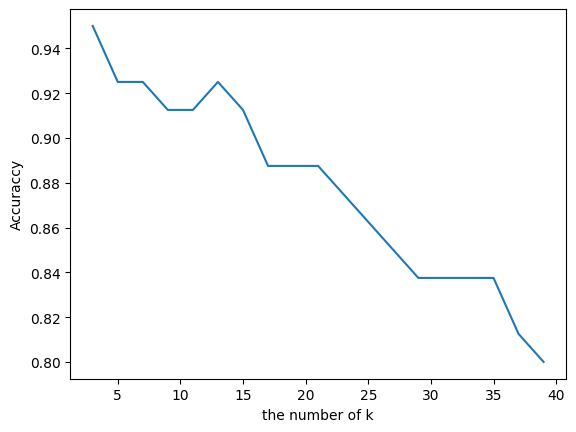

In [129]:
plt.plot(k_list,cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuraccy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

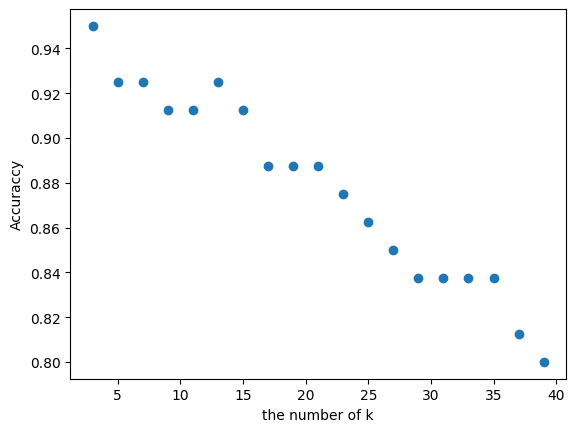

In [130]:
plt.scatter(k_list,cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuraccy')
plt.show

In [131]:
max(cross_validation_scores)

0.95

In [132]:
cross_validation_scores.index(max(cross_validation_scores))

0

In [133]:
k_list[cross_validation_scores.index(max(cross_validation_scores))]

3

In [134]:
aaa=k_list[cross_validation_scores.index(max(cross_validation_scores))]
bbb=max(cross_validation_scores)

print('K는',aaa, " 값은 ",bbb)

K는 3  값은  0.95


In [179]:
knn = KNeighborsClassifier(n_neighbors = 3)

x_train = train_6[['3P','BLK','TRB']]
y_train = train_6[['Pos']]

In [180]:
x_train

,3P,BLK,TRB
97,1.8,0.4,3.3
4,1.5,0.5,4.3
45,1.8,0.1,3.3
54,1.5,0.5,4.5
25,0.0,1.1,13.8
...,...,...,...
73,1.9,0.3,4.3
40,0.0,0.7,3.8
57,0.0,0.7,5.7
35,0.0,0.7,10.4


In [145]:
knn.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [146]:
knn

KNeighborsClassifier(n_neighbors=3)

In [147]:
x_test = test_6[['3P','BLK','TRB']]
y_test = test_6[['Pos']]
pred = knn.predict(x_test)

In [148]:
comparison = pd.DataFrame()
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})

In [149]:
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,SG,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,C
8,C,C
9,SG,C


In [150]:
x_test[14:15]

,3P,BLK,TRB
37,0.9,0.7,4.1


In [151]:
aa=x_test[14:15].values
aa[0]

array([0.9, 0.7, 4.1])

In [152]:
aa[0][0]

0.9

In [153]:
aa[0][1]

0.7

In [154]:
aa[0][2]

4.1

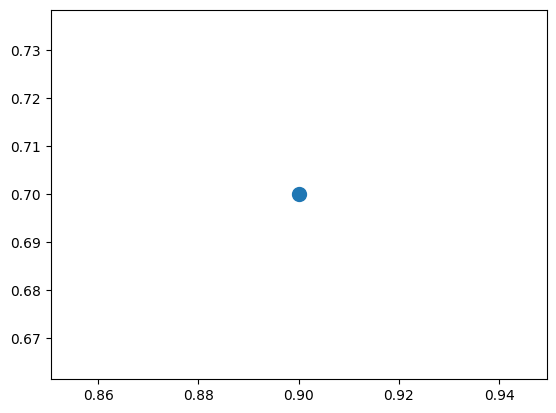

In [157]:
plt.scatter(aa[0][0],aa[0][1],marker='o',s=100)

Text(0.5, 1.0, '3P and BLK in 2d plane')

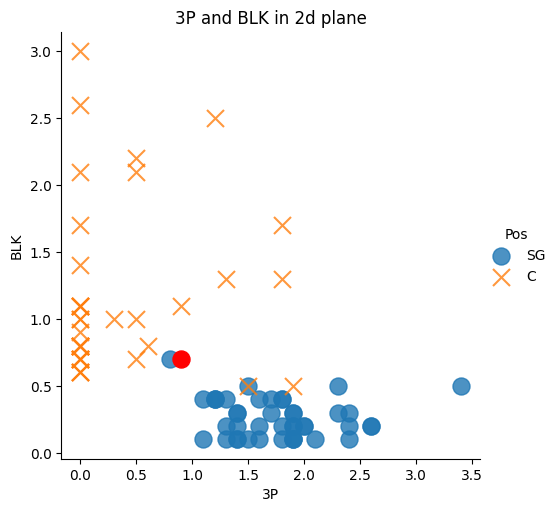

In [159]:
sns.lmplot(data=train_6,x='3P',y='BLK', fit_reg=False,
           scatter_kws={"s":150},
           markers=["o","x"],
           hue="Pos")
plt.scatter(aa[0][0],aa[0][1],marker='o',color='red',s=150)
plt.title('3P and BLK in 2d plane')

Text(0.5, 1.0, '3P and TRB in 2d plane')

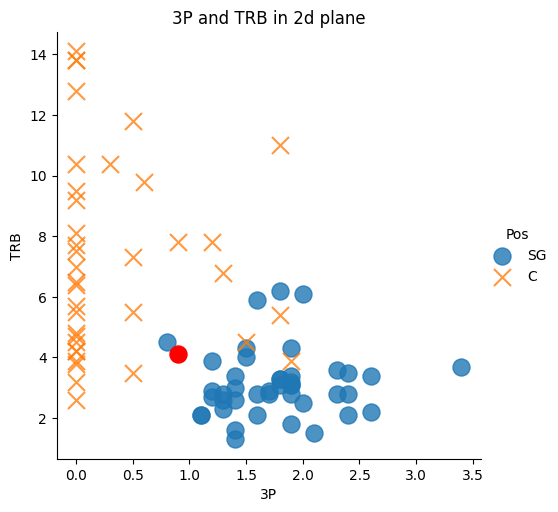

In [160]:
sns.lmplot(data=train_6,x='3P',y='TRB', fit_reg=False,
           scatter_kws={"s":150},
           markers=["o","x"],
           hue="Pos")
plt.scatter(aa[0][0],aa[0][2],marker='o',color='red',s=150)
plt.title('3P and TRB in 2d plane')

Text(0.5, 1.0, 'BLK and TRB in 2d plane')

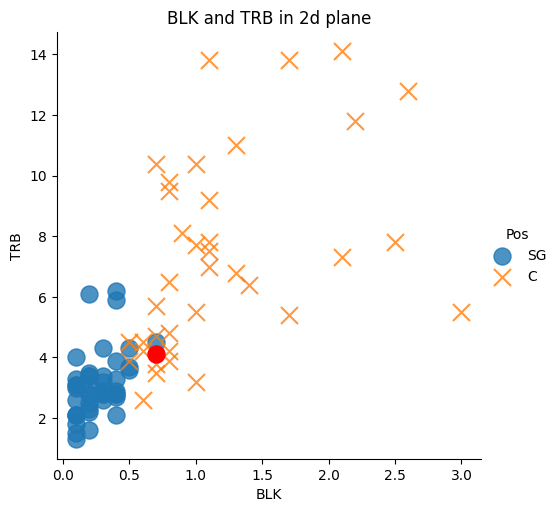

In [161]:
sns.lmplot(data=train_6,x='BLK',y='TRB', fit_reg=False,
           scatter_kws={"s":150},
           markers=["o","x"],
           hue="Pos")
plt.scatter(aa[0][1],aa[0][2],marker='o',color='red',s=150)
plt.title('BLK and TRB in 2d plane')

In [163]:
x_test.head(3)

,3P,BLK,TRB
14,2.0,0.2,3.3
34,3.3,0.5,2.7
30,1.4,1.3,6.3


In [196]:
train_6.reset_index(drop=True,inplace=True)
test_6.reset_index(drop=True,inplace=True)

comparison['3P']=x_test['3P']
comparison['BLK']=x_test['BLK']
comparison['TRB']=x_test['TRB']
comparison

,prediction,ground_truth,3P,BLK,TRB,Player
0,SG,SG,2.0,0.2,3.3,Kentavious Caldwell-Pope
1,SG,SG,3.3,0.5,2.7,Eric Gordon
2,SG,C,1.4,1.3,6.3,Marc Gasol
3,SG,SG,1.4,0.7,3.2,Josh Richardson
4,C,C,0.0,0.6,4.5,Willie Cauley-Stein
5,C,C,0.0,1.2,8.1,Clint Capela
6,C,C,1.2,1.3,12.3,Karl-Anthony Towns
7,SG,C,0.2,0.6,1.6,A.J. Hammons
8,C,C,0.0,0.7,5.1,Tarik Black
9,SG,C,1.3,0.5,4.5,Marreese Speights


In [191]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=99)

In [193]:
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

knn.fit(x_train,y_train.values.ravel())

pred = knn.predict(x_test)

comparison = pd.DataFrame(
    {'prediction':pred,'ground_truth': y_test.values.ravel()})

comparison['3P']=x_test['3P']
comparison['BLK']=x_test['BLK']
comparison['TRB']=x_test['TRB']
comparison['Player']=test['Player']
comparison

,prediction,ground_truth,3P,BLK,TRB,Player
0,SG,SG,NaN,NaN,NaN,NaN
1,SG,SG,NaN,NaN,NaN,NaN
2,SG,C,NaN,NaN,NaN,NaN
3,SG,SG,NaN,NaN,NaN,NaN
4,C,C,NaN,NaN,NaN,NaN
5,C,C,NaN,NaN,NaN,NaN
6,C,C,2.9,0.3,3.1,Bradley Beal
7,SG,C,1.4,0.1,2.4,Marco Belinelli
8,C,C,NaN,NaN,NaN,NaN
9,SG,C,NaN,NaN,NaN,NaN


In [195]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=99)

train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

knn.fit(x_train,y_train.values.ravel())

pred = knn.predict(x_test)

comparison = pd.DataFrame(
    {'prediction':pred,'ground_truth': y_test.values.ravel()})

comparison['3P']=x_test['3P']
comparison['BLK']=x_test['BLK']
comparison['TRB']=x_test['TRB']
comparison['Player']=test['Player']
comparison

,prediction,ground_truth,3P,BLK,TRB,Player
0,SG,SG,2.0,0.2,3.3,Kentavious Caldwell-Pope
1,SG,SG,3.3,0.5,2.7,Eric Gordon
2,SG,C,1.4,1.3,6.3,Marc Gasol
3,SG,SG,1.4,0.7,3.2,Josh Richardson
4,C,C,0.0,0.6,4.5,Willie Cauley-Stein
5,C,C,0.0,1.2,8.1,Clint Capela
6,C,C,1.2,1.3,12.3,Karl-Anthony Towns
7,SG,C,0.2,0.6,1.6,A.J. Hammons
8,C,C,0.0,0.7,5.1,Tarik Black
9,SG,C,1.3,0.5,4.5,Marreese Speights


In [200]:
def add_math(a,b):
  sum =a+b
  return sum

In [201]:
add_math(5,4)

9

In [197]:
def f(row):
  if row['prediction'] == 'SG':
    val = 0
  else:
    val = 1
  return val
comparison['pred_num'] = comparison.apply(f,axis=1)

comparison

,prediction,ground_truth,3P,BLK,TRB,Player,pred_num
0,SG,SG,2.0,0.2,3.3,Kentavious Caldwell-Pope,0
1,SG,SG,3.3,0.5,2.7,Eric Gordon,0
2,SG,C,1.4,1.3,6.3,Marc Gasol,0
3,SG,SG,1.4,0.7,3.2,Josh Richardson,0
4,C,C,0.0,0.6,4.5,Willie Cauley-Stein,1
5,C,C,0.0,1.2,8.1,Clint Capela,1
6,C,C,1.2,1.3,12.3,Karl-Anthony Towns,1
7,SG,C,0.2,0.6,1.6,A.J. Hammons,0
8,C,C,0.0,0.7,5.1,Tarik Black,1
9,SG,C,1.3,0.5,4.5,Marreese Speights,0


In [202]:
def f(row):
  if row['ground_truth'] == 'SG':
    val = 0
  else:
    val = 1
  return val
comparison['ground_truth_num'] = comparison.apply(f,axis=1)

comparison

,prediction,ground_truth,3P,BLK,TRB,Player,pred_num,ground_truth_num
0,SG,SG,2.0,0.2,3.3,Kentavious Caldwell-Pope,0,0
1,SG,SG,3.3,0.5,2.7,Eric Gordon,0,0
2,SG,C,1.4,1.3,6.3,Marc Gasol,0,1
3,SG,SG,1.4,0.7,3.2,Josh Richardson,0,0
4,C,C,0.0,0.6,4.5,Willie Cauley-Stein,1,1
5,C,C,0.0,1.2,8.1,Clint Capela,1,1
6,C,C,1.2,1.3,12.3,Karl-Anthony Towns,1,1
7,SG,C,0.2,0.6,1.6,A.J. Hammons,0,1
8,C,C,0.0,0.7,5.1,Tarik Black,1,1
9,SG,C,1.3,0.5,4.5,Marreese Speights,0,1


In [203]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
Players = go.Layout(title = "농구선수",hovermode = 'closest',
                    font = dict(family='Times New Roman', size = 18),
                    xaxis = dict(title='3P',zeroline=False, gridwidth=2),
                    yaxis = dict(title = 'BLK',zeroline=False, gridwidth = 2),
                    height = 600,
                    width = 800,
              showlegend = False)

trace_all_density = go.Scatter(x=comparison['3P'],
                               y=comparison['BLK'], mode = 'markers', text = comparison['Player'],
                                            marker=dict(size=12,color=comparison['pred_num'],
                                          colorbar = dict(title={'text':"Monotone Color",
                                                                 'font': {'family':'Georgia', 'size': 18}},
                                                          tickfont={'family':'Georgia','size':16})))

data_density = [trace_all_density]
fig_density = go.Figure(data_density,layout=Players)
iplot(fig_density)